<a href="https://colab.research.google.com/github/monteiro-fernando/Data_Science/blob/main/Analisando_os_Dados_do_Airbnb_(Bangkok).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Bangkok*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="20%" src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/Airbnb_Logo_B%C3%A9lo.svg/1280px-Airbnb_Logo_B%C3%A9lo.svg.png"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Bangkok na Tailândia, e ver quais insights podem ser extraídos a partir de dados brutos.**

<center><img alt="Analisando Airbnb" width="50%" src="https://image.freepik.com/fotos-gratis/cityscape-bangkok-night-view_1357-300.jpg"></center>
<center> <a href="https://br.freepik.com/fotos/negocio">Bangkok - Créditos: Waewkidja - br.freepik.com</a>

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Bangkok (good for visualisations).*


In [2]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/thailand/central-thailand/bangkok/2020-12-23/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de identificação do imóvel
* `name` - nome do anúncio da propriedade
* `host_id` - número de identificação do proprietário (anfitrião) do imóvel
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - tipo de quarto oferecido
* `price` - preço da diária do imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,27934,Nice room with superb city view,120437,Nuttee,NaN,Ratchathewi,13.76000,100.54269,Entire home/apt,1660,3,65,2020-01-06,0.61,2,362
1,27942,Town House (1) bedroom available,120462,Donald,NaN,Bangkok Yai,13.73463,100.47540,Private room,906,1,0,NaN,NaN,1,0
2,27979,"Easy going landlord,easy place",120541,Emy,NaN,Bang Na,13.66746,100.61540,Private room,1148,1,0,NaN,NaN,2,358
3,28354,Place near Metro and Shopping Mall ( Monthly o...,121848,Jaruwan,NaN,Chatu Chak,13.80970,100.56527,Entire home/apt,1057,28,52,2019-12-09,0.41,1,364
4,28745,modern-style apartment in Bangkok,123784,Familyroom,NaN,Bang Kapi,13.75379,100.62422,Private room,800,60,0,NaN,NaN,1,365


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**
Essa etapa é importante para verificarmos a quantidade de entradas (linhas) e variáveis (colunas) de nosso *dataset* e também se os dados encontram-se dentro dos formatos esperados (int64, float, object, etc).

No caso específico deste *dataset* não foi necessário fazer alterações no formatos dos dados, logo seguimos com a nossa análise.

In [5]:
# identificar o volume de dados do dataset
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))
# verificar os tipos das variáveis do dataset
display(df.dtypes)

Entradas:	 19709
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Uma das primeiras etapas para verificarmos a qualidade dos dados em análise é checar a quantidade de valores nulos/ausentes em nosso *dataset*.

Com apenas uma linha de código, foi possível verificar que:

* A coluna `neighbourhood_group` possui 100% dos seus valores faltantes; 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em aproximadamente 41% das linhas;
* As variáveis `name` e `host_name` têm menos que 1% dos valores nulos.

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)*100

neighbourhood_group               100.000000
reviews_per_month                  41.174083
last_review                        41.174083
name                                0.050738
host_name                           0.010148
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
minimum_nights                      0.000000
price                               0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
id                                  0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para visualizar a distribuição das variáveis, vamos plotar um histograma.

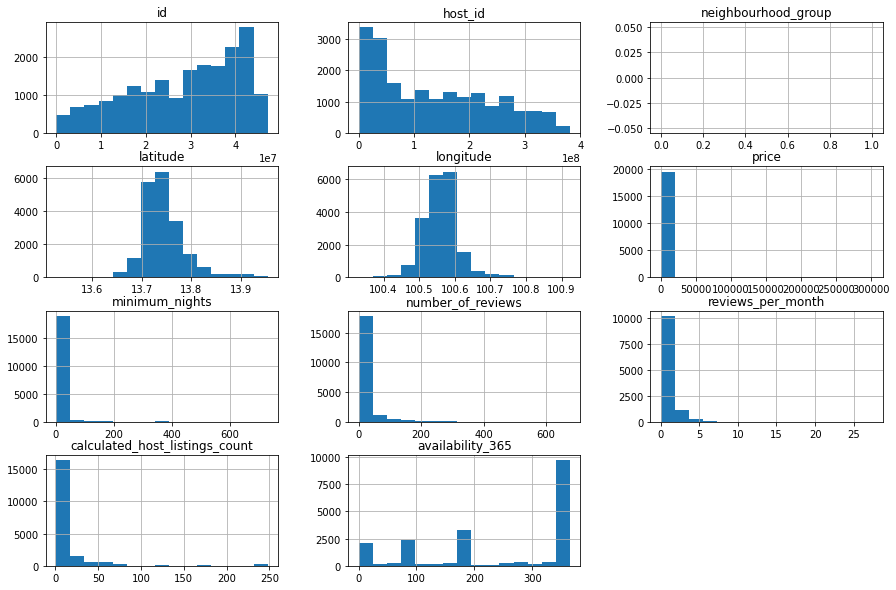

In [7]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há *outliers* presentes?**
Após a visualização dos histogramas, foi possível verificar indícios da presença de *outliers*. 

Vamos focar na variável `price`; logo de cara verifica-se que os valores não seguem uma distribuição, o que acaba distorcendo a representação gráfica.

Para confirmar nossa hipótese vamos verificar o resumo estatístico dos dados, através do método `describe()` e em seguida vamos plotar um `boxplot` para a variável `price`.

In [8]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,19709.000000,19709.000000,19709.000000,11594.000000,19709.000000,19709.000000
mean,2078.154244,11.046020,14.722056,0.745179,14.535339,243.398143
std,6258.269585,36.634581,36.533195,1.006266,34.831971,134.419835
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,706.000000,1.000000,0.000000,0.100000,1.000000,114.000000
50%,1100.000000,1.000000,1.000000,0.330000,4.000000,330.000000
75%,1900.000000,4.000000,11.000000,1.000000,11.000000,365.000000
max,302105.000000,730.000000,676.000000,27.390000,248.000000,365.000000


Com o auxílio do resumo estatístico foi possível verificar o seguinte:
- A variável `price` possui 75% de seus valores abaixo de 1900, no entanto seu valor máximo é 302105 (valor extremamente alto);
- O valor mínimo da variável `price` é 0 (zero). Será que existem acomodações gratuitas em Bangkok? Ou temos algum problema em nosso *DataFrame*?

#### Boxplot para a variável `price`

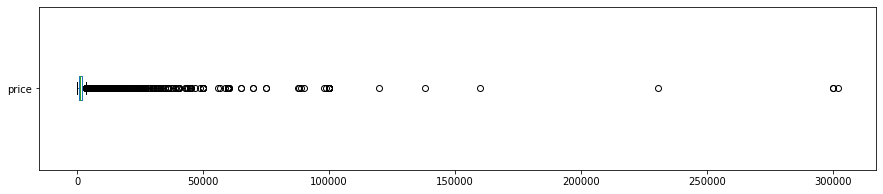


price: valores acima de 4000
1473 entradas
7.4737%

price: valores iguais a 0 (zero)
1 entradas
0.0051%


In [20]:
# boxplot para price
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# verificar a quantidade de valores acima de 4000 para price
print("\nprice: valores acima de 4000")
print("{} entradas".format(len(df[df.price > 4000])))
print("{:.4f}%".format((len(df[df.price > 4000]) / df.shape[0])*100))

# verificar a quantidade de valores iguais a 0 (zero) para price
print("\nprice: valores iguais a 0 (zero)")
print("{} entradas".format(len(df[df.price == 0])))
print("{:.4f}%".format((len(df[df.price == 0]) / df.shape[0])*100))

#### Histograma sem *outliers*
Agora vamos "limpar" nosso *DataFrame*, removendo os outliers anteriormente identificados, e na sequência vamos plotar um novo histograma para a variável `price`.

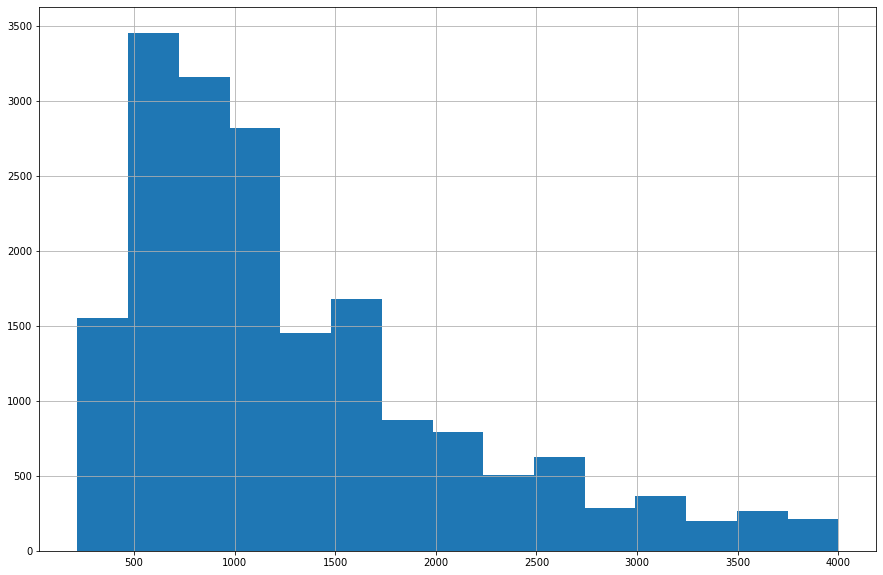

In [23]:
# remover os outliers em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 4000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price == 0].index, axis=0, inplace=True)

# plotar o histograma para a variável price
df_clean.price.hist(bins=15, figsize=(15, 10));

### **Q5. Qual a média dos preços de aluguel?**
Agora vamos comparar a diferença entre a média dos preços de aluguel antes e após a remoção dos *outliers*.

In [24]:
# ver a média da coluna price com outliers
print("Preço médio do aluguel (com outliers):\t {}".format(round(df.price.mean(),2)))

# ver a média da coluna price sem outliers
print("Preço médio do aluguel (sem outliers):\t {}".format(round(df_clean.price.mean(),2)))

Preço médio do aluguel (com outliers):	 2078.15
Preço médio do aluguel (sem outliers):	 1284.64


### **Q6. Qual a correlação existente entre as variáveis**
Para identificar as correlações (relação ou semelhança entre duas coias) existentes entre as variáveis de interesse, vamos fazer o seguinte:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [25]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.040065,-0.021875,0.016896,-0.086671,-0.001711
minimum_nights,-0.040065,1.000000,-0.039741,-0.051443,0.093158,0.046068
number_of_reviews,-0.021875,-0.039741,1.000000,0.855186,-0.030896,0.010686
reviews_per_month,0.016896,-0.051443,0.855186,1.000000,0.050522,-0.044736
calculated_host_listings_count,-0.086671,0.093158,-0.030896,0.050522,1.000000,0.022813
availability_365,-0.001711,0.046068,0.010686,-0.044736,0.022813,1.000000


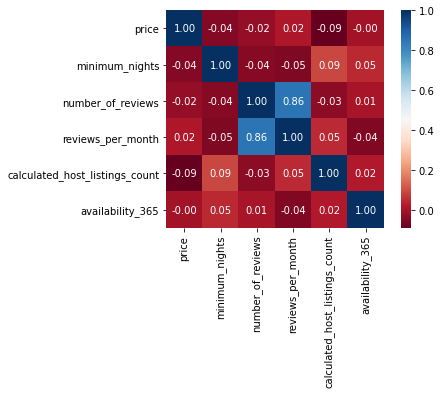

In [26]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True)

Após a análise do *heatmap* verificamos que existe uma correlação forte apenas entre as variáveis `number_of_reviews` e `reviews_per_month`, o que já era de se esperar, visto que quão maior for a quantidade de reviews por mês, maior será a quantidade total de reviews do imóvel.

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**
Dentro do Airbnb é possível alugar diversos tipos de imóveis, como por exemplo: casas inteiras, apartamentos, quartos individuais ou compartilhados, entre outros.

Para verificar o número de ocorrências de cada tipo de imóvel vamos utilizar o método `value_counts()`.

In [27]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    10048
Private room        6566
Hotel room           924
Shared room          697
Name: room_type, dtype: int64

In [28]:
# mostrar a porcentagem de cada tipo de imóvel disponível
round(((df_clean.room_type.value_counts() / df_clean.shape[0])*100), 2)

Entire home/apt    55.10
Private room       36.01
Hotel room          5.07
Shared room         3.82
Name: room_type, dtype: float64

### **Q8. Qual a localidade mais cara em Bangkok?**
Para verificarmos o preço médio (`price`) em função dos bairros (`neighbourhood`) vamos utilizar a função `groupby()`.

In [36]:
# ver preços por bairros, na média
print("Top 10: aluguéis mais caros em Bangkok\n")
round(df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10], 2)

Top 10: aluguéis mais caros em Bangkok



neighbourhood
Parthum Wan       1777.99
Taling Chan       1602.22
Samphanthawong    1577.27
Bang Bon          1572.38
Khlong Sam Wa     1516.42
Vadhana           1509.16
Bang Rak          1507.37
Yan na wa         1478.38
Ratchathewi       1427.63
Nong Chok         1408.33
Name: price, dtype: float64

Neste tipo de análise devemos tomar o cuidado de sempre levar em consideração a quantidade de imóveis disponíveis em cada bairro, verificando se nossa amostra é representativa ou não. Para tanto vamos utilizar o método `value_counts()`.

In [47]:
# ver a quantidade de imóveis disponíveis por bairro
print("Bairros:\t N° de imóveis disponíveis:\n")
df_clean.neighbourhood.value_counts()

Bairros:	 N° de imóveis disponíveis:



Vadhana                 2284
Khlong Toei             2202
Huai Khwang             1458
Ratchathewi             1344
Bang Rak                 974
Sathon                   835
Phra Nakhon              775
Phra Khanong             663
Chatu Chak               599
Din Daeng                557
Bang Na                  553
Phaya Thai               511
Parthum Wan              511
Khlong San               476
Suanluang                444
Bang Kapi                314
Bang Sue                 272
Thon buri                257
Lat Krabang              247
Bang Phlat               234
Don Mueang               208
Yan na wa                206
Phasi Charoen            174
Pra Wet                  172
Lak Si                   152
Wang Thong Lang          151
Bangkok Noi              151
Pom Prap Sattru Phai     148
Bang Khen                145
Bang Kho laen            141
Samphanthawong           124
Dusit                    108
Bang Khae                 97
Bangkok Yai               94
Chom Thong    

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

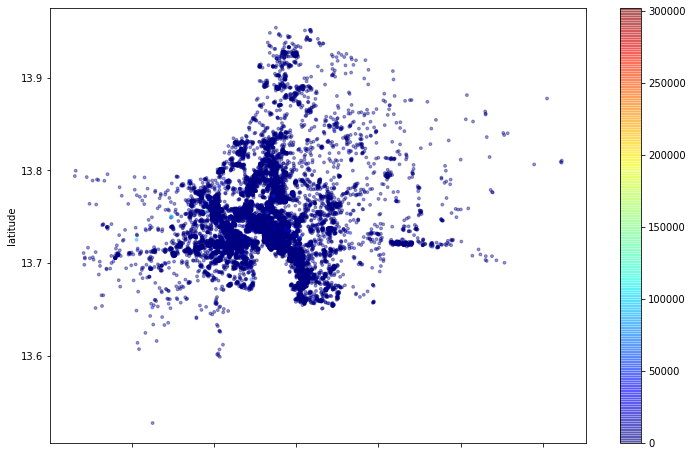

In [15]:
# plotar os imóveis pela latitude-longitude
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
        c=df['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões
Nesta análise superficial na base de dados do Airbnb referente à cidade de Bangkok na Tailândia, foi possível aplicar alguns conceitos básicos de *Data Science* como: importação e manipulação de dados, visualização de gráficos e a obtenção de *insights* a partir da utilização de métodos e funções da linguagem de programação **Python**.

Foi possível identificar e eliminar os *outliers* da variável `price`, obtendo um preço médio mais "realista".

Também foi possível verificar a quantidade de imóveis disponíveis em cada bairro, sendo este um fator que pode acabar distorcendo as informações estatísticas de algumas variáveis.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Em uma próxima análise exploratória, recomenda-se a utilização do conjunto de dados completos, com 106 atributos disponíveis. 